In [58]:
import numpy as np
from structure import central_thermal, integrate
from eos import mean_molecular_weight
from zams import Teff, surface_luminosity
from astro_const import Rsun, Msun, Lsun
from scipy.optimize import brentq

r0 = 0.000000001

# delta_m = 1e-30

# eta = 1e-20

# xi = 0.05

delta_m = 5e-20
eta = 1e-20
xi = 5e-2

XH = 0.706

Z = np.array([1,2,7])
A = np.array([1,4, 14])
X = np.array([XH, 0.275, 0.019])

mu = mean_molecular_weight(Z,A,X)

# S_mass = 0.3
R = 0.33333


def min_this(R_guess, S_mass, delta_m, eta, xi, mu):

    Pc, rhoc, Tc = central_thermal(S_mass, R_guess, mu)

    m, r, p, l = integrate(Pc,rhoc,Tc,delta_m,eta,xi,mu)

    # calculating desired radius
    L_want = surface_luminosity(Teff(S_mass*Msun),r[-1])

    return L_want - l[-1]

mass_list = np.array([0.1, 0.15, 0.2, 0.3])
# mass_list = [0.1]
L_list = np.zeros(len(mass_list))
Teff_list = np.zeros(len(mass_list))
rhoc_list = np.zeros(len(mass_list))
Tc_list = np.zeros(len(mass_list))
R_list = np.zeros(len(mass_list))


for i,S_mass in enumerate(mass_list):
    
    R_final = brentq(min_this,a = 0.0001, b = 1, args = (S_mass, delta_m, eta, xi, mu))

    T_surf = Teff(S_mass)

    Teff_list[i] = T_surf

    L_list[i] = surface_luminosity(T_surf,R_final*Rsun)/Lsun

    Pc, rhoc, Tc = central_thermal(S_mass, R_final, mu)

    rhoc_list[i] = 1000*rhoc/(100**3)

    Tc_list[i] = Tc

    R_list[i] = R_final

    print(R_final)

    

c:\Users\elias\Desktop\AST 304\AST_304_Projects\project3\structure.py:139: RuntimeWarning: overflow encountered in true_divide
  H_z = z/np.abs(dzdm)
c:\Users\elias\Desktop\AST 304\AST_304_Projects\project3\structure.py:139: RuntimeWarning: divide by zero encountered in true_divide
  H_z = z/np.abs(dzdm)


0.14085524933997434
0.18912950330077877
0.23277251003846705
0.3112455095821611


In [59]:
print(L_list)

[0.00109861 0.00317268 0.00578874 0.01166237]


Text(0, 0.5, 'log($L/L_\\odot$)')

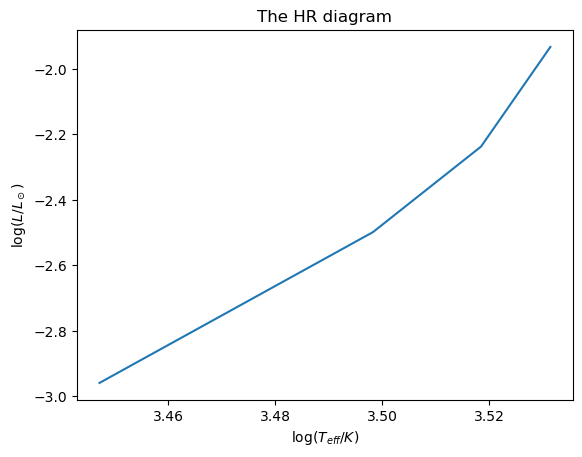

In [60]:
import matplotlib.pyplot as plt

plt.plot(np.log10(Teff_list), np.log10(L_list))
# plt.xlim(max(Teff_list), min(Teff_list))
# plt.xscale("log")
# plt.yscale("log")

plt.title("The HR diagram")
plt.xlabel(r"log($T_{eff}/K$)")
plt.ylabel(r"log($L/L_\odot$)")

Text(0, 0.5, 'log($T_c/K$)')

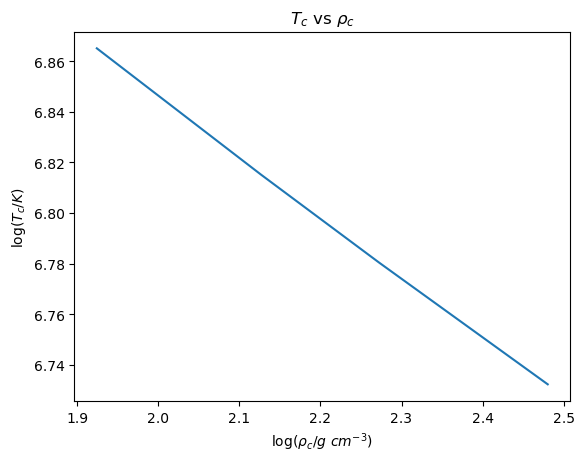

In [61]:
plt.plot(np.log10(rhoc_list), np.log10(Tc_list))
# plt.xscale("log")
# plt.yscale("log")

plt.title(r"$T_c$ vs $\rho_c$")
plt.xlabel(r"log($\rho_c/g$ $cm^{-3}$)")
plt.ylabel(r"log($T_c/K$)")

In [62]:
R_final = brentq(min_this,a = 0.01, b = 1, xtol = 1e-10,args = (.3, delta_m, eta, xi, mu))
Pc, rhoc, Tc = central_thermal(.3, R_final, mu)
m, r, p, l = integrate(Pc,rhoc,Tc,delta_m,eta,xi,mu)

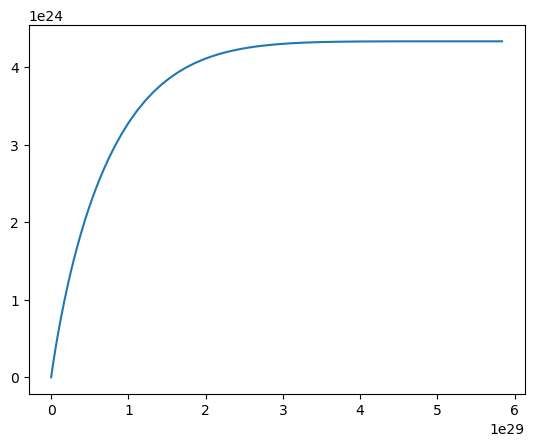

In [63]:
plt.plot(m,l)

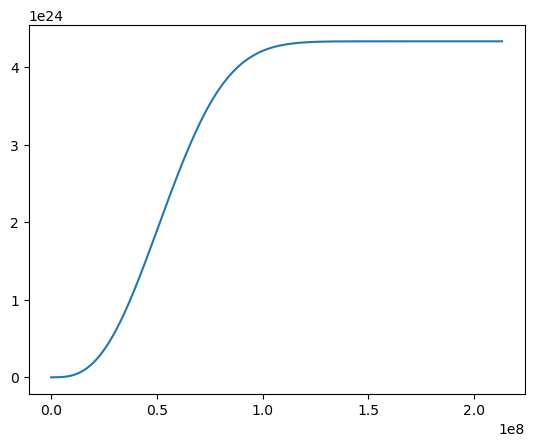

In [64]:
plt.plot(r,l)

In [65]:
r[np.max(np.where(l <= np.max(l)*0.9))]

83474584.05279231

In [66]:
m[np.max(np.where(l <= np.max(l)*0.9))]/(.3*Msun)

0.2578890976866146

In [67]:
T = Tc*(p/Pc)**(1-1/(5/3))

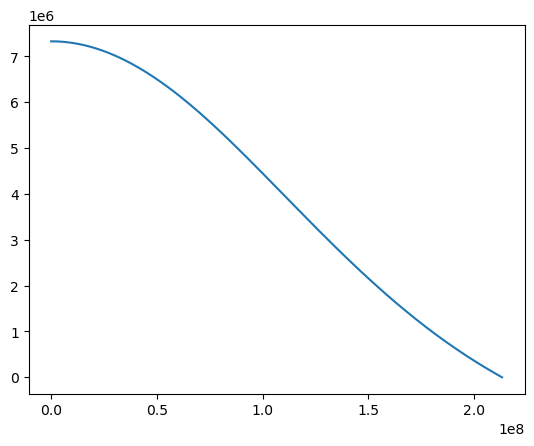

In [68]:
plt.plot(r,T)

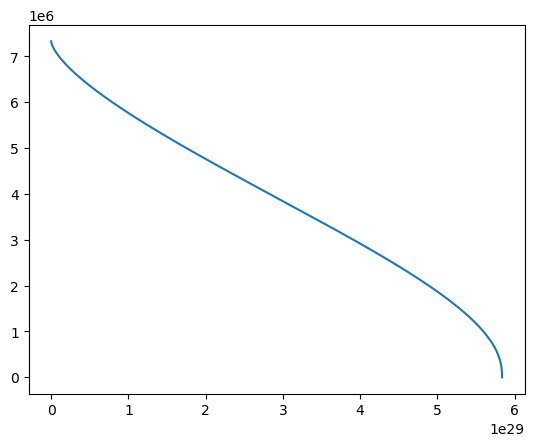

In [69]:
plt.plot(m,T)